In [27]:
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.constants import c
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import csv
import pandas as pd
import sympy as sym
import fprlib as fp
import glob

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

#x,y = np.loadtxt('osciloskop_meritve.csv', delimiter=',', skiprows=1, unpack=True)

"""
# Grafiranje:

fig, ax = plt.subplots()

ax.plot(x, y, c="darkblue", ls="-", lw=0.5, label=r"Napetost na vezju")
ax.plot([-0.07,0.07], [32,32],c="r", ls="-", lw=0.4, label=r"32 V napetost")
ax.grid(True, which="both")
plt.xlabel(r"Čas [s]")
plt.ylabel(r"Amplituda [V]")
plt.legend(loc='best')
#ax.set_ylim([-1, 1])
ax.set_xlim([-0.00005, 0.0007])
plt.title("Začetno odstopanje napetosti skozi vezje tuljave")
fig.show()
fig.savefig("start_impulse", dpi=600, bbox_inches='tight', transparent=False)
"""
print("...") # Narejeno da ne izpiše celotnega block comment-a zgoraj \lol

...


In [113]:
dx = [0.00015, 0.00014, 0.00014, 0.00014, 0.00015]
dx = ufloat(np.average(dx), np.std(dx))

st_p = [90,95,94,96,98]
dp = ufloat(2,0.1)
dst = ufloat(np.round(np.average(st_p)), np.round(np.std(st_p)))

N_k = ufloat(15.5, 0.5)

c
N = ufloat(100, 5)
lamb = ufloat(632.8, 0.1) * 10**-9
lambZ = 550 * 10**-9
L = ufloat(0.050, 0.001)

In [201]:
R = N*lamb/(2*dx)
print("R : {:.2f}".format(R))

R : 0.22+/-0.01


In [117]:
dn = N*lamb/2/L
print(dn)

0.000633+/-0.000034


In [241]:
fit_x = [0, 2]
fit_y = [0, 0.000633]
yerr =  [0, 0.000034]

def linear(x, a, b):
    return a*x +b

I1, I2 = curve_fit(linear, fit_x, fit_y)
naklon = I1[0]
print("tlak @ 1000 bar :", naklon*1000)

fit_y = [0, 0.000633*1000]
yerr =  [0, 0.000034*1000]


tlak @ 1000 bar : 0.3165


In [243]:
print("d_k", N_k*lambZ)
print("tau_k", (N_k*lambZ)/c)
print("D nu", c/(N_k*lambZ))

d_k (8.53+/-0.28)e-06
tau_k (2.84+/-0.09)e-14
D nu (3.52+/-0.11)e+13


Text(0.5, 1.0, 'Lomni količnik v odvisnosit od tlaka')

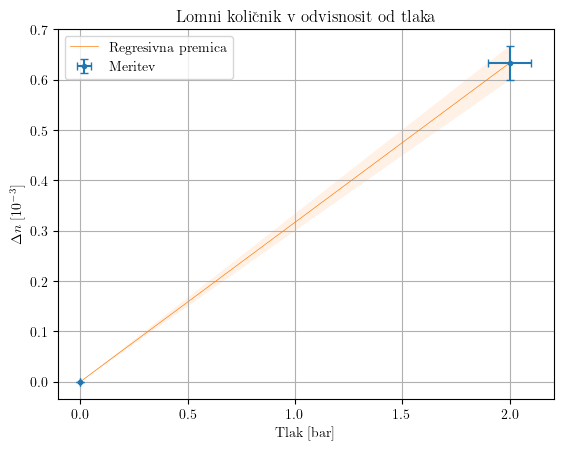

In [247]:

# Grafiranje:

fig, ax = plt.subplots()

ax.errorbar(fit_x, fit_y, yerr = yerr, xerr = [0, 0.1], fmt = ".", capsize=3, label = "Meritev")
ax.plot([0,1,2],[0, 1*naklon*1000, 2*naklon*1000], label = "Regresivna premica", lw=0.5)
ax.fill_between([0,1,2], [(0)*1000, (1*naklon+0.000017)*1000, (2*naklon+0.000034)*1000],[(0)*1000, (1*naklon-0.000017)*1000, (2*naklon-0.000034)*1000] , facecolor='C1', alpha=0.1)
ax.grid(True, which="both")
plt.ylabel(r"$\Delta n$ [$10^{-3}$]")
plt.xlabel(r"Tlak [bar]")
plt.legend(loc='best')
#ax.set_ylim([-1, 1])
#ax.set_xlim([-0.00005, 0.0007])
plt.title("Lomni količnik v odvisnosit od tlaka")
#fig.savefig("lomni_kolicnik", dpi=600, bbox_inches='tight', transparent=False)